<a href="https://colab.research.google.com/github/MerArch/Restuarant_menu_optimisation/blob/main/Restuarant_menu.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#About Dataset
###Context
This dataset contains lists of Restaurants and their menus in the USA that are partnered with Uber Eats.
Data was collected via web scraping using Python libraries.

*This dataset is dedicated to the awesome delivery drivers of Uber Eats, hence the cover image

### Data

restaurants.csv (55k+ entries, 11 columns)

id (Restaurant id)
position (Restaurant position in the search result)
name (Restaurant name)
score (Restaurant score)
ratings (Ratings count)
category (Restaurant category)
price_range (Restaurant price range - $ = Inexpensive, $$ = Moderately expensive, $$$ = Expensive, $$$$ = Very Expensive) - Source - stackoverflow
full_address (Restaurant full address)
zip_code (Zip code)
lat (Latitude)
long (Longitude)
restaurant-menus.csv (4.4M+ entries, 5 columns)

restaurant_id (Restaurant id)
category (Menu category)
name (Menu Name)
description (Menu description)
price (Menu price)

##Acknowledgements
Data was scraped from -

https://www.ubereats.com - An online food ordering and delivery platform launched by Uber in 2014. Users can read menus, reviews, ratings, order, and pay for food from participating restaurants using an application on the iOS or Android platforms or through a web browser. Users are also able to tip for delivery. Payment is charged to a card on file with Uber. Meals are delivered by couriers using cars, scooters, bikes, or foot. It is operational in over 6,000 cities across 45 countries.
Cover Image -
Photo by eggbank on Unsplash

##Disclaimer
The data and information in the data set provided here are intended to use for educational purposes only. I do not own any of the data, and all rights are reserved to the respective owners.

##Inspiration
How many Restaurants are around the USA?
What are the Most Popular/Highly Rated Restaurants and menus?
Is there any relationship between the price level and the popularity of a restaurant?
Which menus are more expensive?
Which menus are very common in the USA?

In [ ]:
#import libraries
import numpy as np
import pandas as pd
import matplotlib as plt
import zipfile
# load the data
menu = pd.read_csv('/content/restaurants_project1a.csv')

In [ ]:
menu.head()

,id,position,name,score,ratings,category,price_range,full_address,zip_code,lat,lng
0,1,19,PJ Fresh (224 Daniel Payne Drive),NaN,NaN,"Burgers, American, Sandwiches",$,"224 Daniel Payne Drive, Birmingham, AL, 35207",35207,33.562365,-86.830703
1,2,9,J' ti`'z Smoothie-N-Coffee Bar,NaN,NaN,"Coffee and Tea, Breakfast and Brunch, Bubble Tea",NaN,"1521 Pinson Valley Parkway, Birmingham, AL, 35217",35217,33.583640,-86.773330
2,3,6,Philly Fresh Cheesesteaks (541-B Graymont Ave),NaN,NaN,"American, Cheesesteak, Sandwiches, Alcohol",$,"541-B Graymont Ave, Birmingham, AL, 35204",35204,33.509800,-86.854640
3,4,17,Papa Murphy's (1580 Montgomery Highway),NaN,NaN,Pizza,$,"1580 Montgomery Highway, Hoover, AL, 35226",35226,33.404439,-86.806614
4,5,162,Nelson Brothers Cafe (17th St N),4.7,22.0,"Breakfast and Brunch, Burgers, Sandwiches",NaN,"314 17th St N, Birmingham, AL, 35203",35203,33.514730,-86.811700


In [ ]:
# Specify the path to your ZIP file
zip_file_path = "/content/restaurant-menus_1b.csv.zip"

# Create a ZipFile object and extract its contents
with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
    zip_ref.extractall("resturant_menu")  # Extract all files to a destination folder


In [ ]:
restur_menu = pd.read_csv('/content/resturant_menu/restaurant-menus.csv')
restur_menu.head()

,restaurant_id,category,name,description,price
0,1,Extra Large Pizza,Extra Large Meat Lovers,Whole pie.,15.99 USD
1,1,Extra Large Pizza,Extra Large Supreme,Whole pie.,15.99 USD
2,1,Extra Large Pizza,Extra Large Pepperoni,Whole pie.,14.99 USD
3,1,Extra Large Pizza,Extra Large BBQ Chicken &amp; Bacon,Whole Pie,15.99 USD
4,1,Extra Large Pizza,Extra Large 5 Cheese,Whole pie.,14.99 USD


Check for Missing Values

In [ ]:
# Check for missing values in each column
missing_values = menu.isnull().sum()
print(missing_values)

id                 0
position           0
name               0
score           2831
ratings         2831
category           1
price_range      581
full_address      22
zip_code          22
lat                0
lng                0
dtype: int64


In [ ]:
# Check for missing values in each column
missing_values = restur_menu.isnull().sum()
print(missing_values)

restaurant_id        0
category             0
name                 0
description      86285
price                0
dtype: int64


Rename the column to resturant_id in both files for mergeing

In [ ]:
import pandas as pd
import pandas as pd

# Rename the column
menu.rename(columns={'id': 'restaurant_id'}, inplace=True)

# Save the updated DataFrame back to the CSV file
menu.to_csv('renamed_id_menu.csv', index=False)

# # Merge the two DataFrames based on the 'id' column
# merged_restur_id_ratings = pd.merge(menu, restur_menu, on='id', how='inner')

# # Save the merged DataFrame to a new CSV file
# merged_restur_id_ratings.to_csv('merged_id_ratings.csv', index=False)


Load and merge both files

In [ ]:
# Merge the two DataFrames based on the 'id' column
merged_restur_id_ratings = pd.merge(menu, restur_menu, on='restaurant_id', how='inner')

# Save the merged DataFrame to a new CSV file
merged_restur_id_ratings.to_csv('merged_id_ratings.csv', index=False)

In [ ]:
merged_restur_id_ratings.head()

,restaurant_id,position,name_x,score,ratings,category_x,price_range,full_address,zip_code,lat,lng,category_y,name_y,description,price
0,1,19,PJ Fresh (224 Daniel Payne Drive),NaN,NaN,"Burgers, American, Sandwiches",$,"224 Daniel Payne Drive, Birmingham, AL, 35207",35207,33.562365,-86.830703,Extra Large Pizza,Extra Large Meat Lovers,Whole pie.,15.99 USD
1,1,19,PJ Fresh (224 Daniel Payne Drive),NaN,NaN,"Burgers, American, Sandwiches",$,"224 Daniel Payne Drive, Birmingham, AL, 35207",35207,33.562365,-86.830703,Extra Large Pizza,Extra Large Supreme,Whole pie.,15.99 USD
2,1,19,PJ Fresh (224 Daniel Payne Drive),NaN,NaN,"Burgers, American, Sandwiches",$,"224 Daniel Payne Drive, Birmingham, AL, 35207",35207,33.562365,-86.830703,Extra Large Pizza,Extra Large Pepperoni,Whole pie.,14.99 USD
3,1,19,PJ Fresh (224 Daniel Payne Drive),NaN,NaN,"Burgers, American, Sandwiches",$,"224 Daniel Payne Drive, Birmingham, AL, 35207",35207,33.562365,-86.830703,Extra Large Pizza,Extra Large BBQ Chicken &amp; Bacon,Whole Pie,15.99 USD
4,1,19,PJ Fresh (224 Daniel Payne Drive),NaN,NaN,"Burgers, American, Sandwiches",$,"224 Daniel Payne Drive, Birmingham, AL, 35207",35207,33.562365,-86.830703,Extra Large Pizza,Extra Large 5 Cheese,Whole pie.,14.99 USD


In [ ]:
menu_data = pd.read_csv('/content/merged_id_ratings.csv')
menu_data.head()

<ipython-input-17-e3c35d756a85>:1: DtypeWarning: Columns (1) have mixed types. Specify dtype option on import or set low_memory=False.
  menu_data = pd.read_csv('/content/merged_id_ratings.csv')


,restaurant_id,position,name_x,score,ratings,category_x,price_range,full_address,zip_code,lat,lng,category_y,name_y,description,price
0,1.0,19,PJ Fresh (224 Daniel Payne Drive),NaN,NaN,"Burgers, American, Sandwiches",$,"224 Daniel Payne Drive, Birmingham, AL, 35207",35207,33.562365,-86.830703,Extra Large Pizza,Extra Large Meat Lovers,Whole pie.,15.99 USD
1,1.0,19,PJ Fresh (224 Daniel Payne Drive),NaN,NaN,"Burgers, American, Sandwiches",$,"224 Daniel Payne Drive, Birmingham, AL, 35207",35207,33.562365,-86.830703,Extra Large Pizza,Extra Large Supreme,Whole pie.,15.99 USD
2,1.0,19,PJ Fresh (224 Daniel Payne Drive),NaN,NaN,"Burgers, American, Sandwiches",$,"224 Daniel Payne Drive, Birmingham, AL, 35207",35207,33.562365,-86.830703,Extra Large Pizza,Extra Large Pepperoni,Whole pie.,14.99 USD
3,1.0,19,PJ Fresh (224 Daniel Payne Drive),NaN,NaN,"Burgers, American, Sandwiches",$,"224 Daniel Payne Drive, Birmingham, AL, 35207",35207,33.562365,-86.830703,Extra Large Pizza,Extra Large BBQ Chicken &amp; Bacon,Whole Pie,15.99 USD
4,1.0,19,PJ Fresh (224 Daniel Payne Drive),NaN,NaN,"Burgers, American, Sandwiches",$,"224 Daniel Payne Drive, Birmingham, AL, 35207",35207,33.562365,-86.830703,Extra Large Pizza,Extra Large 5 Cheese,Whole pie.,14.99 USD


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from wordcloud import WordCloud
import warnings
warnings.filterwarnings('ignore')
plt.style.use('ggplot')

In [ ]:
import zipfile
# Specify the path to your ZIP file
zip_file_path = "/content/restaurant-menus_1b.csv.zip"

# Create a ZipFile object and extract its contents
with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
    zip_ref.extractall("resturant_menu")  # Extract all files to a destination folder


In [ ]:
restaurants_menu = pd.read_csv('/content/resturant_menu/restaurant-menus.csv')
restaurants = pd.read_csv('/content/restaurants_project1a.csv')

In [ ]:
restaurants_menu.head()

,restaurant_id,category,name,description,price
0,1,Extra Large Pizza,Extra Large Meat Lovers,Whole pie.,15.99 USD
1,1,Extra Large Pizza,Extra Large Supreme,Whole pie.,15.99 USD
2,1,Extra Large Pizza,Extra Large Pepperoni,Whole pie.,14.99 USD
3,1,Extra Large Pizza,Extra Large BBQ Chicken &amp; Bacon,Whole Pie,15.99 USD
4,1,Extra Large Pizza,Extra Large 5 Cheese,Whole pie.,14.99 USD


In [ ]:
restaurants.head()

,id,position,name,score,ratings,category,price_range,full_address,zip_code,lat,lng
0,1,19,PJ Fresh (224 Daniel Payne Drive),NaN,NaN,"Burgers, American, Sandwiches",$,"224 Daniel Payne Drive, Birmingham, AL, 35207",35207,33.562365,-86.830703
1,2,9,J' ti`'z Smoothie-N-Coffee Bar,NaN,NaN,"Coffee and Tea, Breakfast and Brunch, Bubble Tea",NaN,"1521 Pinson Valley Parkway, Birmingham, AL, 35217",35217,33.583640,-86.773330
2,3,6,Philly Fresh Cheesesteaks (541-B Graymont Ave),NaN,NaN,"American, Cheesesteak, Sandwiches, Alcohol",$,"541-B Graymont Ave, Birmingham, AL, 35204",35204,33.509800,-86.854640
3,4,17,Papa Murphy's (1580 Montgomery Highway),NaN,NaN,Pizza,$,"1580 Montgomery Highway, Hoover, AL, 35226",35226,33.404439,-86.806614
4,5,162,Nelson Brothers Cafe (17th St N),4.7,22.0,"Breakfast and Brunch, Burgers, Sandwiches",NaN,"314 17th St N, Birmingham, AL, 35203",35203,33.514730,-86.811700


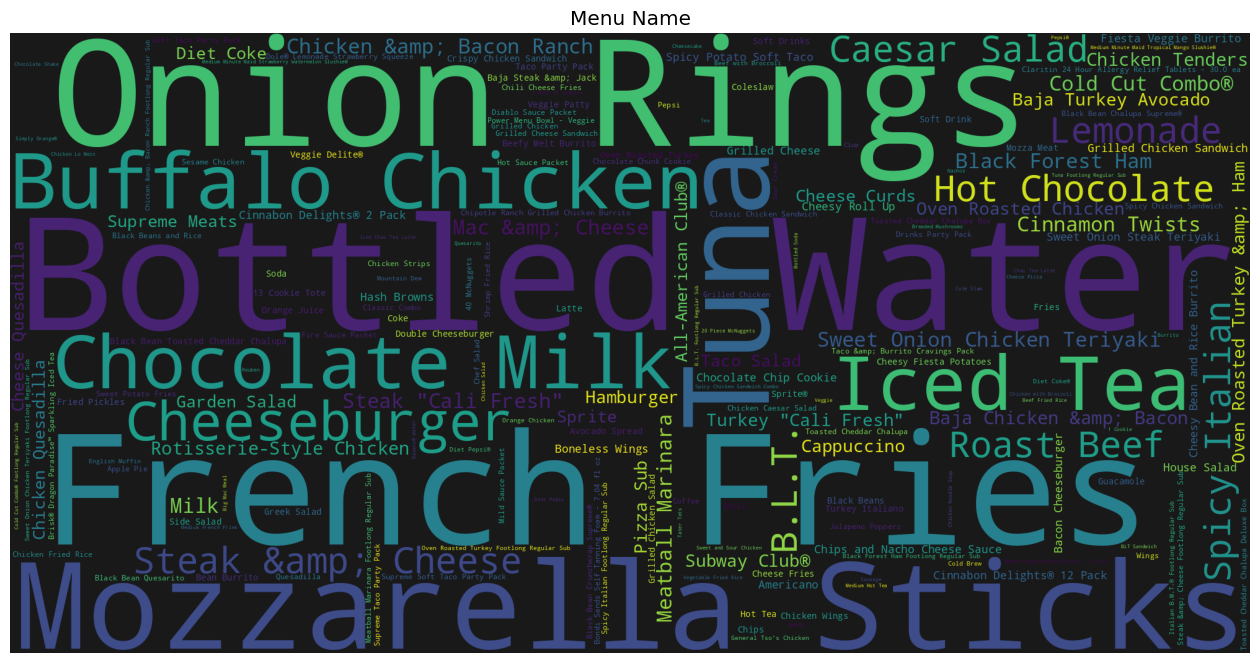

In [ ]:
plt.figure(figsize=(16,10))
data = restaurants_menu['name'].value_counts().to_dict()
wc = WordCloud(width= 2000, height = 1000, random_state=1,background_color='#191919').generate_from_frequencies(data)
plt.imshow(wc)
plt.title('Menu Name')
plt.axis('off')
plt.show()

In [ ]:
freefood = restaurants_menu[restaurants_menu.price == '0.0 USD']
paidfood = restaurants_menu[restaurants_menu.price != '0.0 USD']

print("Free Food : ",len(freefood))
print("Paid Food : ",len(paidfood))

Free Food :  23701
Paid Food :  379539


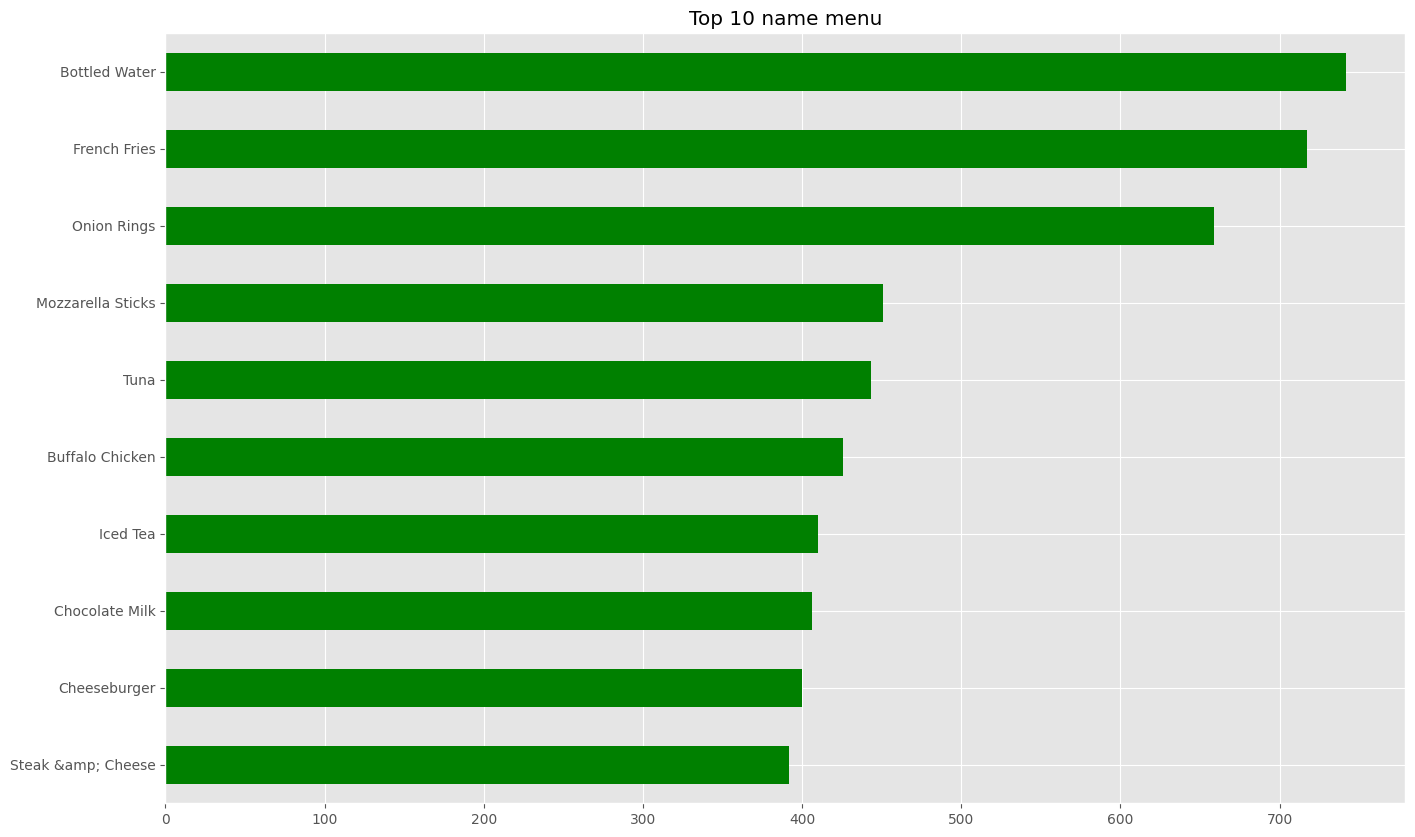

In [ ]:
plt.figure(figsize=(16,10))
ax = restaurants_menu['name'].value_counts().iloc[:10].plot(kind="barh", color = 'green')
ax.invert_yaxis()
ax.title.set_text('Top 10 name menu')

In [ ]:
restaurant_merge = pd.merge(restaurants, restaurants_menu, left_on='id', right_on='restaurant_id')
restaurant_merge.head()

,id,position,name_x,score,ratings,category_x,price_range,full_address,zip_code,lat,lng,restaurant_id,category_y,name_y,description,price
0,1,19,PJ Fresh (224 Daniel Payne Drive),NaN,NaN,"Burgers, American, Sandwiches",$,"224 Daniel Payne Drive, Birmingham, AL, 35207",35207,33.562365,-86.830703,1,Extra Large Pizza,Extra Large Meat Lovers,Whole pie.,15.99 USD
1,1,19,PJ Fresh (224 Daniel Payne Drive),NaN,NaN,"Burgers, American, Sandwiches",$,"224 Daniel Payne Drive, Birmingham, AL, 35207",35207,33.562365,-86.830703,1,Extra Large Pizza,Extra Large Supreme,Whole pie.,15.99 USD
2,1,19,PJ Fresh (224 Daniel Payne Drive),NaN,NaN,"Burgers, American, Sandwiches",$,"224 Daniel Payne Drive, Birmingham, AL, 35207",35207,33.562365,-86.830703,1,Extra Large Pizza,Extra Large Pepperoni,Whole pie.,14.99 USD
3,1,19,PJ Fresh (224 Daniel Payne Drive),NaN,NaN,"Burgers, American, Sandwiches",$,"224 Daniel Payne Drive, Birmingham, AL, 35207",35207,33.562365,-86.830703,1,Extra Large Pizza,Extra Large BBQ Chicken &amp; Bacon,Whole Pie,15.99 USD
4,1,19,PJ Fresh (224 Daniel Payne Drive),NaN,NaN,"Burgers, American, Sandwiches",$,"224 Daniel Payne Drive, Birmingham, AL, 35207",35207,33.562365,-86.830703,1,Extra Large Pizza,Extra Large 5 Cheese,Whole pie.,14.99 USD


In [ ]:
bestmenu = restaurant_merge.groupby('name_y').count().sort_values(by = 'id', ascending=False).head(20)
bestmenu

,id,position,name_x,score,ratings,category_x,price_range,full_address,zip_code,lat,lng,restaurant_id,category_y,description,price
name_y,,,,,,,,,,,,,,,
Bottled Water,742,742,742,474,474,742,666,741,741,742,742,742,742,210,742
French Fries,717,717,717,306,306,717,629,712,712,717,717,717,717,228,717
Onion Rings,659,659,659,225,225,659,576,658,658,659,659,659,659,285,659
Mozzarella Sticks,451,451,451,200,200,451,399,451,451,451,451,451,451,331,451
Tuna,443,443,443,138,138,443,440,443,443,443,443,443,443,432,443
Buffalo Chicken,426,426,426,112,112,426,418,425,425,426,426,426,426,424,426
Iced Tea,410,410,410,180,180,409,387,408,408,410,410,410,410,184,410
Chocolate Milk,406,406,406,197,197,406,394,404,404,406,406,406,406,180,406
Cheeseburger,400,400,400,192,192,400,355,394,394,400,400,400,400,260,400


## squarify
Here are some common use cases and the main uses of the Squarify library in Python:

Hierarchical Data Visualization: Squarify is primarily used to visualize hierarchical or structured data. It allows you to represent categories, subcategories, and quantities in a single, compact, and visually intuitive format.

Proportional Representation: The size of each rectangle in a treemap corresponds to a quantitative value. This makes it easy to see relative proportions and comparisons between different categories or subcategories.

Data Exploration: Treemaps can be used for exploring and understanding complex datasets. They help users quickly identify patterns, trends, and outliers within the data.

Portfolio Visualization: In finance, treemaps are often used to visualize portfolio diversification. Each rectangle represents a different asset, and the size of the rectangle corresponds to the asset's market value.

Disk Usage Analysis: Treemaps can be used to visualize disk usage on a computer or server. Each rectangle represents a directory or file, and the size of the rectangle shows the amount of disk space it occupies.

Resource Allocation: Treemaps can be used in resource allocation scenarios. For example, they can represent how a budget is distributed across different departments or projects within an organization.

Market Share Analysis: In business, treemaps can be used to visualize market share data. Each rectangle can represent a company, product, or brand, and the size of the rectangle shows its market share.

Visualization of Data Structures: Treemaps can be used to visualize various hierarchical data structures, such as organizational charts or file system structures.

In [ ]:
!pip install squarify


##Best Menus##

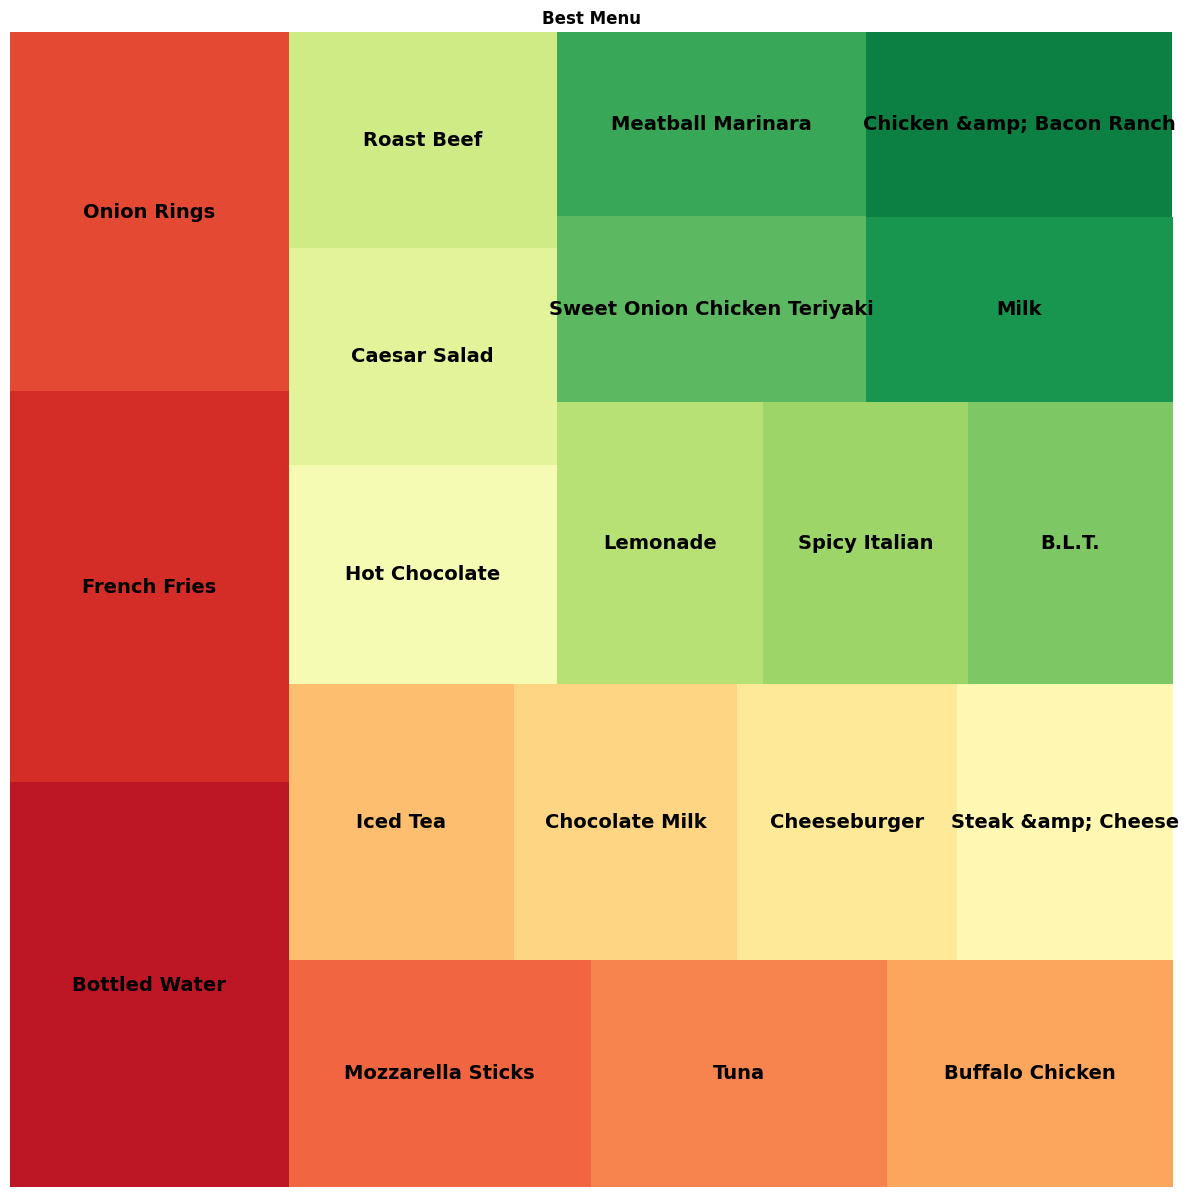

In [ ]:
from matplotlib import gridspec

import squarify

y = bestmenu
fig = plt.figure(figsize=(15, 15))
squarify.plot(sizes = y.id, label = y.index, color=sns.color_palette("RdYlGn", n_colors=20),
             linewidth=4, text_kwargs={'fontsize':14, 'fontweight' : 'bold'})
plt.title('Best Menu', position=(0.5, 1.0+0.03), fontsize = 12, fontweight='bold')
plt.axis('off')
plt.show()

In [ ]:
restaurants.price_range.unique()

array(['$', nan, '$$', '$$$', '$$$$'], dtype=object)

In [ ]:
plt.figure(figsize=(5,4))
print('$ = Inexpensive:',len(restaurants[restaurants.price_range == '$']))
print('$$ = Moderately Expensive:',len(restaurants[restaurants.price_range == '$$']))
print('$$$ = Expensive:',len(restaurants[restaurants.price_range == '$$$']))
print('$$$$ = Very Expensive:',len(restaurants[restaurants.price_range == '$$$$']))




# Show plots
plt.show()

$ = Inexpensive: 2716
$$ = Moderately Expensive: 1690
$$$ = Expensive: 12
$$$$ = Very Expensive: 1


<Figure size 500x400 with 0 Axes>

##find why histograph or piechart is not displaying

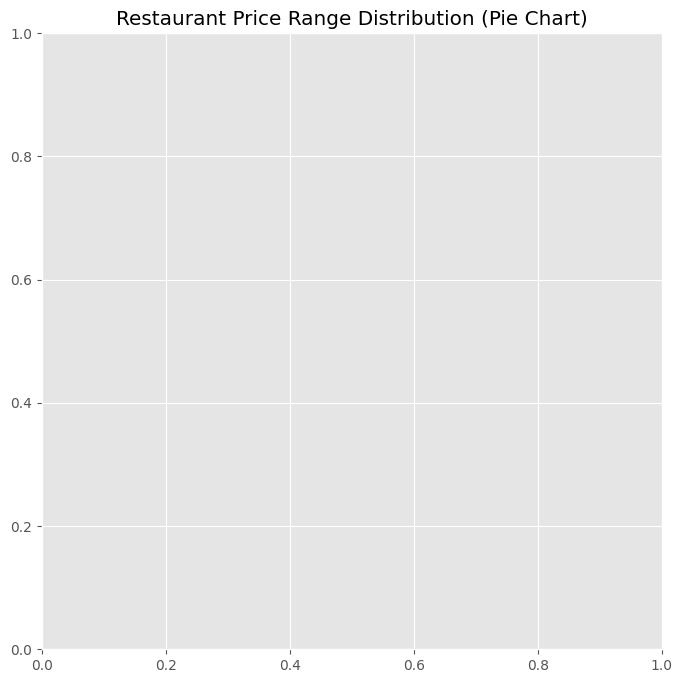

In [ ]:
import matplotlib.pyplot as plt

# Data
price_ranges = ['$ Inexpensive', '$$ Moderately Expensive', '$$$ Expensive', '$$$$ Very Expensive']
counts = [
    len(restaurants[restaurants.price_range == '$']),
    len(restaurants[restaurants.price_range == '$$']),
    len(restaurants[restaurants.price_range == '$$$']),
    len(restaurants[restaurants.price_range == '$$$$'])
]

# Create a pie chart
plt.figure(figsize=(8, 8))
# plt.pie(counts, labels=price_ranges, autopct='%1.1f%%', startangle=140)
plt.title('Restaurant Price Range Distribution (Pie Chart)')

# Show the pie chart
plt.show()




##🍲 Restaurant Types¶



In [ ]:
fig = px.pie(restaurants, names='price_range',title='Population of Price Range in Menus', template = 'plotly_dark')
fig.update_traces(textposition='inside')
fig.update_layout(uniformtext_minsize=14, uniformtext_mode='hide',showlegend=True)

def newLegend(fig, newNames):
    for item in newNames:
        for i, elem in enumerate(fig.data[0].labels):
            if elem == item:
                fig.data[0].labels[i] = newNames[item]
    return(fig)

fig = newLegend(fig = fig, newNames = {'$':'Inexpensive',
                                       '$$' : 'Moderately Expensive',
                                      '$$$' : 'Expensive',
                                      '$$$$' : 'Very Expensive'})


fig.show()

##🧆 Most Popular Restaurants¶


In [ ]:
popular_restaurant = restaurants.sort_values(['score','ratings'], ascending=False)
popular_restaurant.head()

,id,position,name,score,ratings,category,price_range,full_address,zip_code,lat,lng
2105,2106,188,Colectivo Prospect,5.0,103.0,"Coffee and Tea, American, Breakfast and Brunch",$,"2211 North Prospect Avenue, Milwaukee, WI, 53202",53202,43.059145,-87.885167
3096,3097,25,Michelangelo's Coffee House,5.0,51.0,"Coffee and Tea, Bakery, Juice and Smoothies, A...",$,"114 State Street, Madison, WI, 53703",53703,43.075016,-89.387200
2511,2512,12,Crumbl Cookies (WI - Oak Creek),5.0,45.0,"Desserts, Coffee and Tea",$,"160 w town square way, oak creek, WI, 53154",53154,42.900540,-87.914760
3140,3141,23,Yummee,5.0,45.0,"American, Desserts, Coffee and Tea",$$,"5510 University Avenue, Madison, WI, 53705",53705,43.083090,-89.475560
964,965,7,"Baskin-Robbins (5000 Whitesburg Dr S, Suite 156)",5.0,42.0,"Desserts, Ice Cream + Frozen Yogurt, Comfort Food",$,"5000 Whitesburg Dr SW, Huntsville, AL, 35802",35802,34.690520,-86.569150


In [ ]:
popular_restaurant.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 5000 entries, 2105 to 4999
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   id            5000 non-null   int64  
 1   position      5000 non-null   int64  
 2   name          5000 non-null   object 
 3   score         2169 non-null   float64
 4   ratings       2169 non-null   float64
 5   category      4999 non-null   object 
 6   price_range   4419 non-null   object 
 7   full_address  4978 non-null   object 
 8   zip_code      4978 non-null   object 
 9   lat           5000 non-null   float64
 10  lng           5000 non-null   float64
dtypes: float64(4), int64(2), object(5)
memory usage: 468.8+ KB


In [ ]:
fig = px.scatter(popular_restaurant, x="score", y="ratings",
     size_max=45, log_x=True, template='plotly_dark')

fig.update_layout(legend=dict(
    yanchor="top",
    y=0.99,
    xanchor="left",
    x=0.01
))

fig.show()

In [ ]:
popular_restaurant.head()

,id,position,name,score,ratings,category,price_range,full_address,zip_code,lat,lng
2105,2106,188,Colectivo Prospect,5.0,103.0,"Coffee and Tea, American, Breakfast and Brunch",$,"2211 North Prospect Avenue, Milwaukee, WI, 53202",53202,43.059145,-87.885167
3096,3097,25,Michelangelo's Coffee House,5.0,51.0,"Coffee and Tea, Bakery, Juice and Smoothies, A...",$,"114 State Street, Madison, WI, 53703",53703,43.075016,-89.387200
2511,2512,12,Crumbl Cookies (WI - Oak Creek),5.0,45.0,"Desserts, Coffee and Tea",$,"160 w town square way, oak creek, WI, 53154",53154,42.900540,-87.914760
3140,3141,23,Yummee,5.0,45.0,"American, Desserts, Coffee and Tea",$$,"5510 University Avenue, Madison, WI, 53705",53705,43.083090,-89.475560
964,965,7,"Baskin-Robbins (5000 Whitesburg Dr S, Suite 156)",5.0,42.0,"Desserts, Ice Cream + Frozen Yogurt, Comfort Food",$,"5000 Whitesburg Dr SW, Huntsville, AL, 35802",35802,34.690520,-86.569150


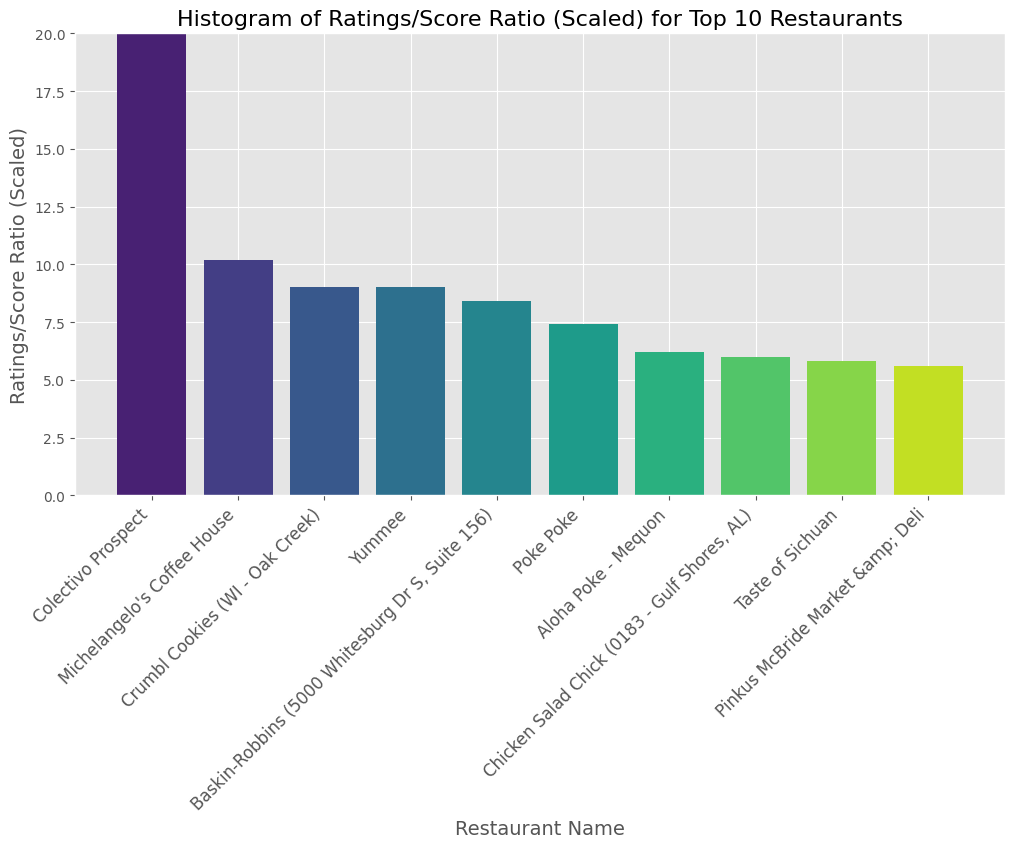

In [ ]:

# Assuming you have a DataFrame named 'popular_restaurant' with columns 'name', 'ratings', and 'score'

# Select the first 10 rows of data
top_10_restaurants = popular_restaurant.head(10)


# Calculate ratings divided by scores and scale it between 0 to 20
ratings_scores_ratio_scaled = (top_10_restaurants['ratings'] / top_10_restaurants['score'])

# Create a histogram
plt.figure(figsize=(12, 6))
# Define a color palette with multiple colors
colors = sns.color_palette("viridis", len(top_10_restaurants))
plt.bar(top_10_restaurants['name'], ratings_scores_ratio_scaled, color= colors)
plt.xlabel('Restaurant Name', fontsize=14)
plt.ylabel('Ratings/Score Ratio (Scaled)', fontsize=14)
plt.title('Histogram of Ratings/Score Ratio (Scaled) for Top 10 Restaurants', fontsize=16)
plt.xticks(rotation=45, ha="right", fontsize=12)
plt.ylim(0, 20)  # Set the y-axis limit to 0 to 20

# Show the histogram
plt.show()


In [ ]:
restaurants.score.unique()


array([nan, 4.7, 4.6, 5. , 4.9, 3.7, 4.8, 4.3, 4.4, 4.1, 4.5, 4.2, 4. ,
       3.8, 3.9, 3.5, 3.2, 3.6, 3. , 3.4, 3.3, 3.1])

##🗺️ Heatmap Restaurant By Scores

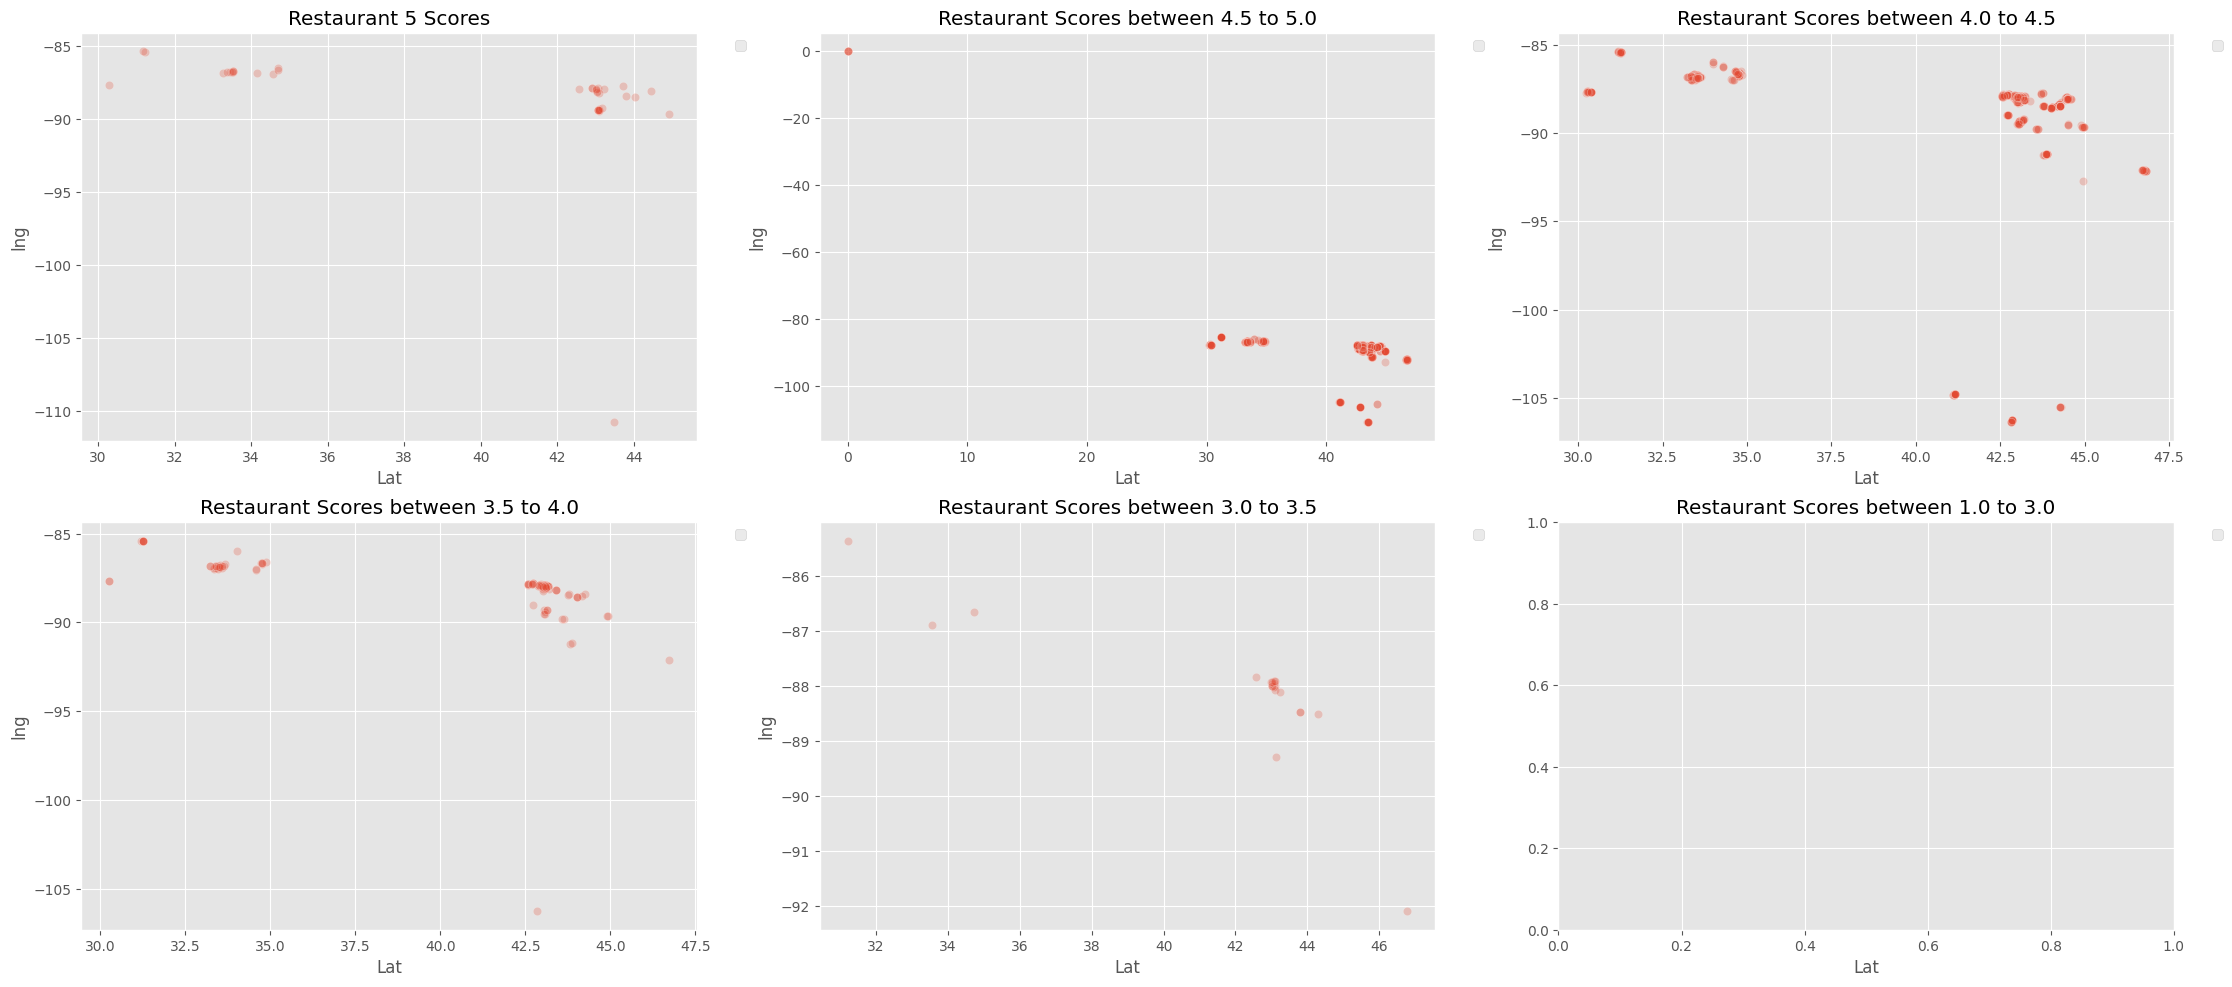

In [ ]:
fig = plt.figure(figsize=(27,18))

sub1 = fig.add_subplot(3,3,1)
sub1.set_xlabel('Lat')
sub1.set_title('Restaurant 5 Scores')
sns.scatterplot(x='lat',y='lng', data=popular_restaurant[popular_restaurant.score == 5.0], alpha=0.25)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2)

sub1 = fig.add_subplot(3,3,2)
sub1.set_xlabel('Lat')
sub1.set_title('Restaurant Scores between 4.5 to 5.0')
sns.scatterplot(x='lat',y='lng', data=popular_restaurant[ (popular_restaurant.score >= 4.5) & (popular_restaurant.score < 5.0)], alpha=0.25)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2)

sub1 = fig.add_subplot(3,3,3)
sub1.set_xlabel('Lat')
sub1.set_title('Restaurant Scores between 4.0 to 4.5')
sns.scatterplot(x='lat',y='lng', data=popular_restaurant[ (popular_restaurant.score >= 4.0) & (popular_restaurant.score < 4.5)], alpha=0.25)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2)

sub1 = fig.add_subplot(3,3,4)
sub1.set_xlabel('Lat')
sub1.set_title('Restaurant Scores between 3.5 to 4.0')
sns.scatterplot(x='lat',y='lng', data=popular_restaurant[ (popular_restaurant.score >= 3.5) & (popular_restaurant.score < 4.0)], alpha=0.25)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2)

sub1 = fig.add_subplot(3,3,5)
sub1.set_xlabel('Lat')
sub1.set_title('Restaurant Scores between 3.0 to 3.5')
sns.scatterplot(x='lat',y='lng', data=popular_restaurant[ (popular_restaurant.score >= 3.0) & (popular_restaurant.score < 3.5)], alpha=0.25)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2)

sub1 = fig.add_subplot(3,3,6)
sub1.set_xlabel('Lat')
sub1.set_title('Restaurant Scores between 1.0 to 3.0')
sns.scatterplot(x='lat',y='lng', data=popular_restaurant[ (popular_restaurant.score >= 1.0) & (popular_restaurant.score < 3.0)], alpha=0.25)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2)

##🗾 Heatmap Restaurants in USA

In [ ]:
df_new = popular_restaurant.dropna()

In [ ]:
df_new = df_new[(df_new.lat.notnull())]
df_new = df_new[(df_new.lat != -1) & (df_new.lng != -1)]
df_new = df_new[~df_new.lat.isna()]

In [ ]:
import folium

places = []

map_offenses = folium.Map(location=[37.09024,-95.712891], zoom_start=4.3)
for i, loc in df_new.iterrows():
    places.append((loc['lat'], loc['lng']))

In [ ]:
from folium import plugins

map_offenses.add_children(plugins.HeatMap(places, radius=18))

##📍 Restaurant Locations

In [ ]:
# Make an empty map
m = folium.Map(location=[37.09024,-95.712891], tiles="OpenStreetMap", zoom_start=4)

# Show the map
m
# add marker one by one on the map
for i in range(0,len(df_new)):
   folium.Marker(
      location=[df_new.iloc[i]['lat'], df_new.iloc[i]['lng']],
      popup=df_new.iloc[i]['full_address'],
   ).add_to(m)

# Show the map again
m

##⭐ Five Star Restaurants

In [ ]:
fivestar=df_new.loc[(df_new['score'] == 5.0)]['full_address'].value_counts()
fivestar

2211 North Prospect Avenue, Milwaukee, WI, 53202                  1
114 State Street, Madison, WI, 53703                              1
3551 Washington Ave Frontage Rd, Sheboygan, WI, 53081             1
90 East Broadway, Jackson, WY, 83001                              1
3230 Ross Clark Circle, Suite 3, Dothan, AL, 36303                1
8201 South Howell Ave, Oak Creek, WI, 53154                       1
2000 Riverchase Galleria, Birmingham, AL, 35244                   1
1879 Cherokee Avenue Sw, Cullman, AL, 35055                       1
1450 Capitol Dr, Pewaukee, USA, Village of Pewaukee, WI, 53072    1
2201 2nd Ave S Suite 105, Birmingham, AL, 35233                   1
7001 Crestwood Blvd, Ste 114, Birmingham, AL, 35213               1
3255 South Oates Street. Suite 8, Dothan, AL, 36301               1
6090 Old Madison Pike NW, Huntsville, AL, 35806                   1
1234 S 108th St, West Allis, WI, 53214                            1
315 W Murdock Ave, Oshkosh, WI, 54901           

In [ ]:
# Make an empty map
m = folium.Map(location=[37.09024,-95.712891], tiles="OpenStreetMap", zoom_start=4.2)

# Show the map
m
# add marker one by one on the map
for i in range(0,len(fivestar)):
   folium.Marker(
      location=[df_new.iloc[i]['lat'], df_new.iloc[i]['lng']],
      popup=df_new.iloc[i]['full_address'],
       icon=folium.Icon(color="red", icon="glyphicon-cutlery"),
   ).add_to(m)

# Show the map again
m